In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("rock_density_xray.csv")

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ["Signal","Density"]

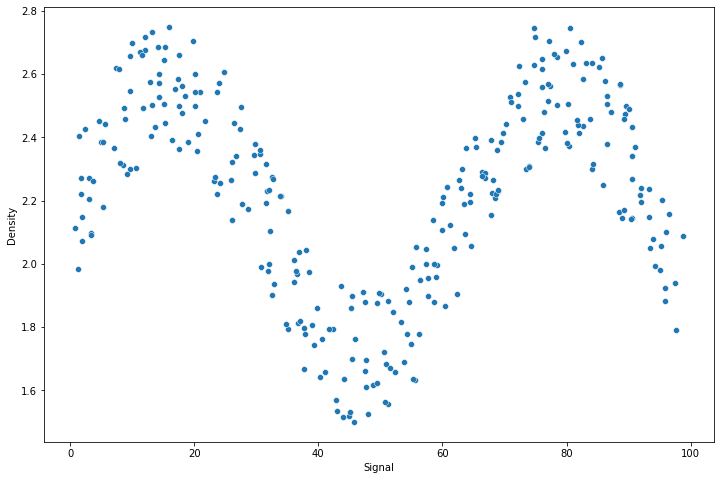

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Signal", y="Density", data=df);

In [8]:
X = df.Signal.values.reshape(-1,1)
y = df.Density

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr_model = LinearRegression()

In [13]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [14]:
lr_preds = lr_model.predict(X_test)

In [15]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [35]:
signal_range = np.arange(0,100)

In [36]:
lr_output = lr_model.predict(signal_range.reshape(-1,1))

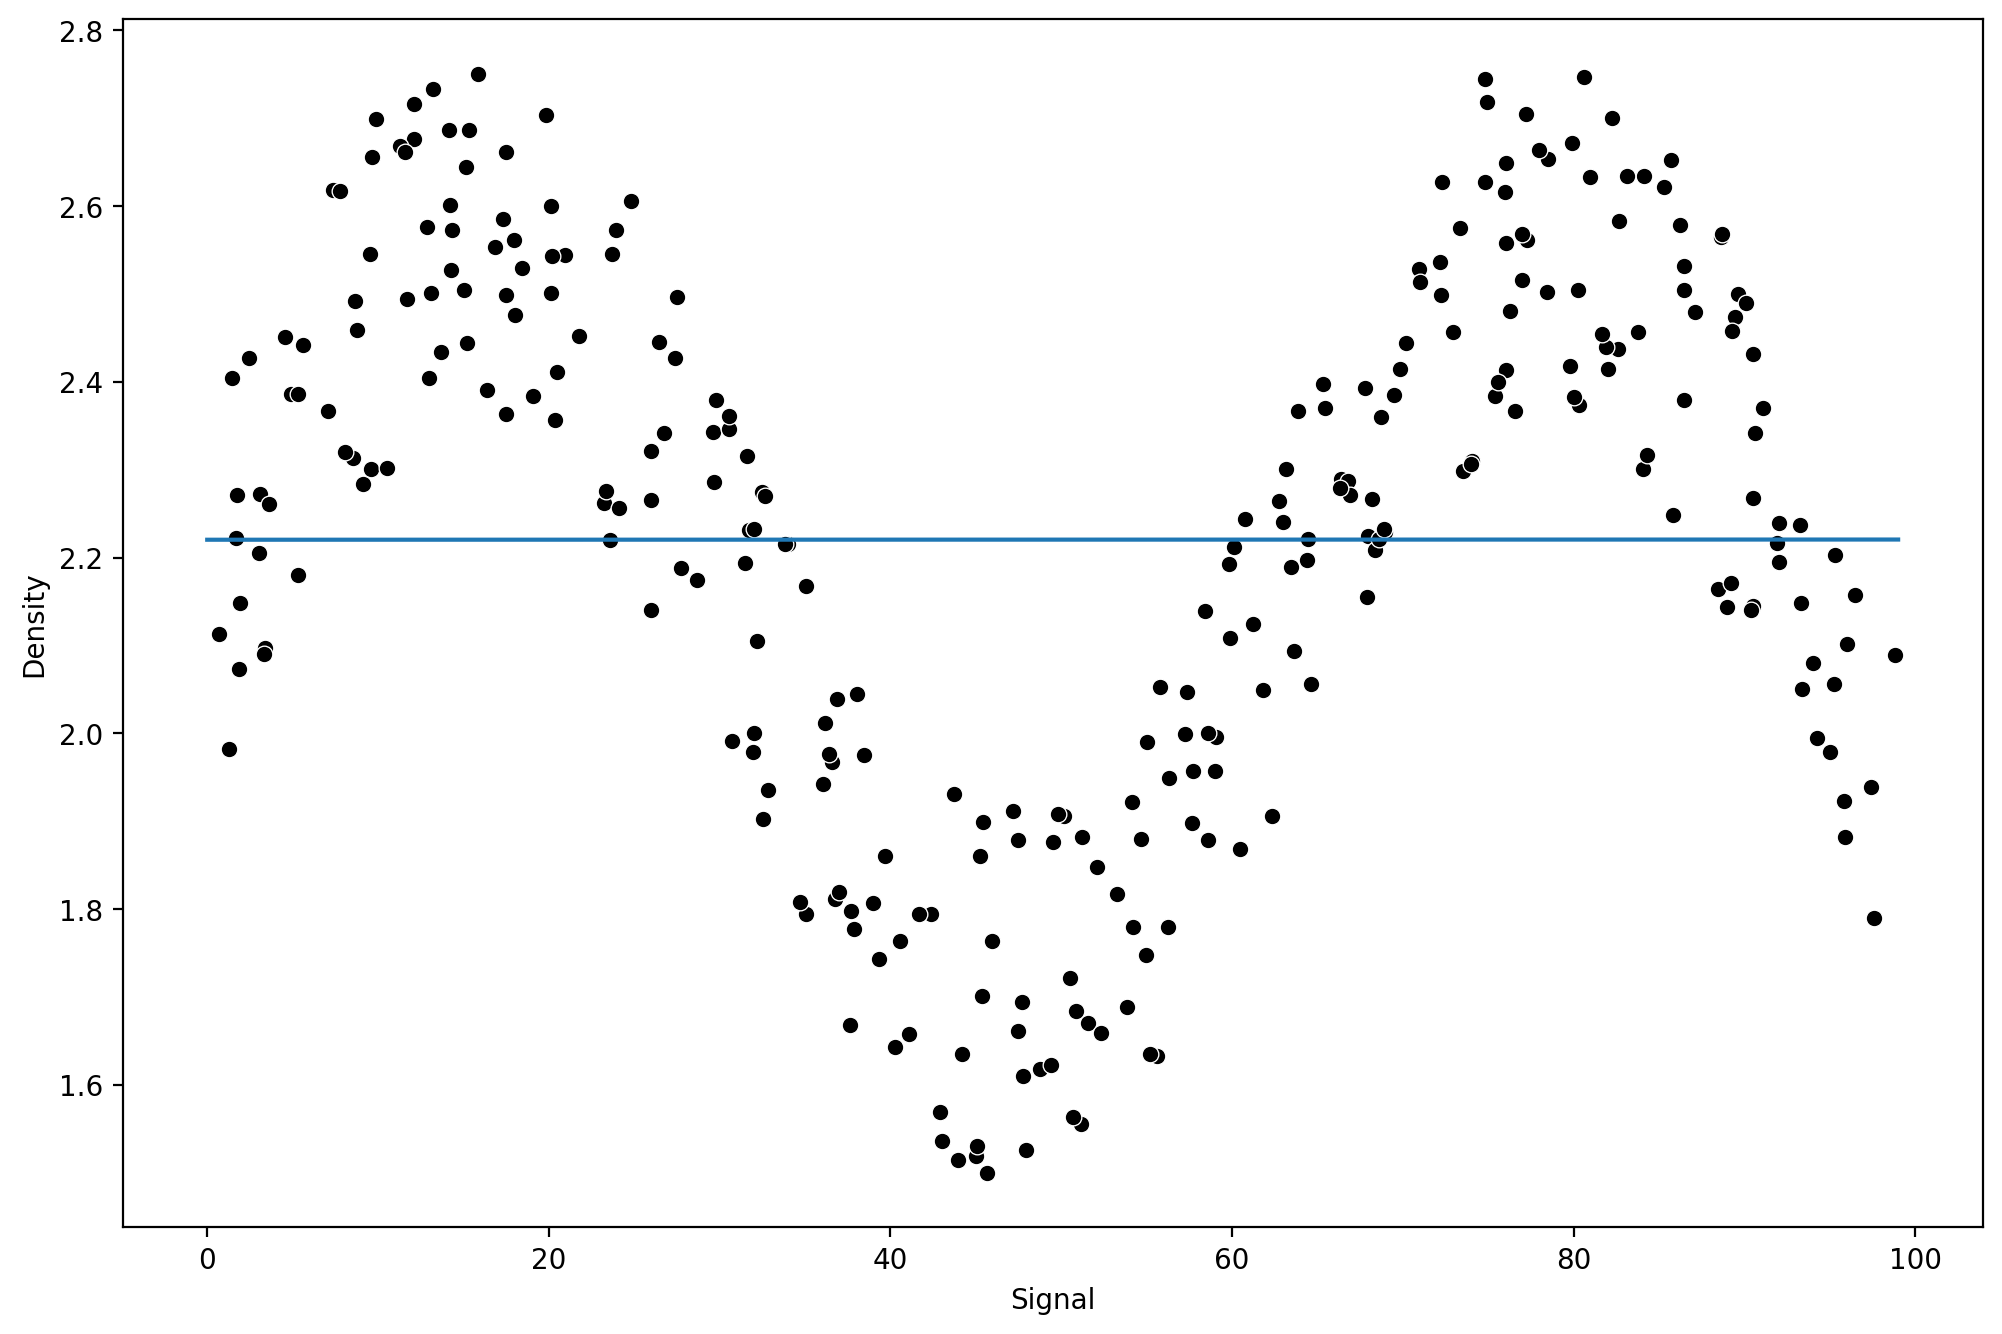

In [38]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')
plt.plot(signal_range,lr_output);

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [23]:
eval_metrics(y_test, lr_preds)

r2_score: -0.034267281425702345 
 mae: 0.211198973318633 
 mse: 0.06605167265148641 
 rmse: 0.25700519965846297


In [43]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # FIT MODEL TRAINING
    model.fit(X_train,y_train)
    
    # GET METRICS
    preds = model.predict(X_test)
    eval_metrics(y_test, preds)
    
    # PLOT RESULTS MODEL SIGNAL RANGE
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,8),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


In [50]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

r2_score: 0.7014766225517415 
 mae: 0.11969152420598782 
 mse: 0.019064673861526334 
 rmse: 0.13807488497741482


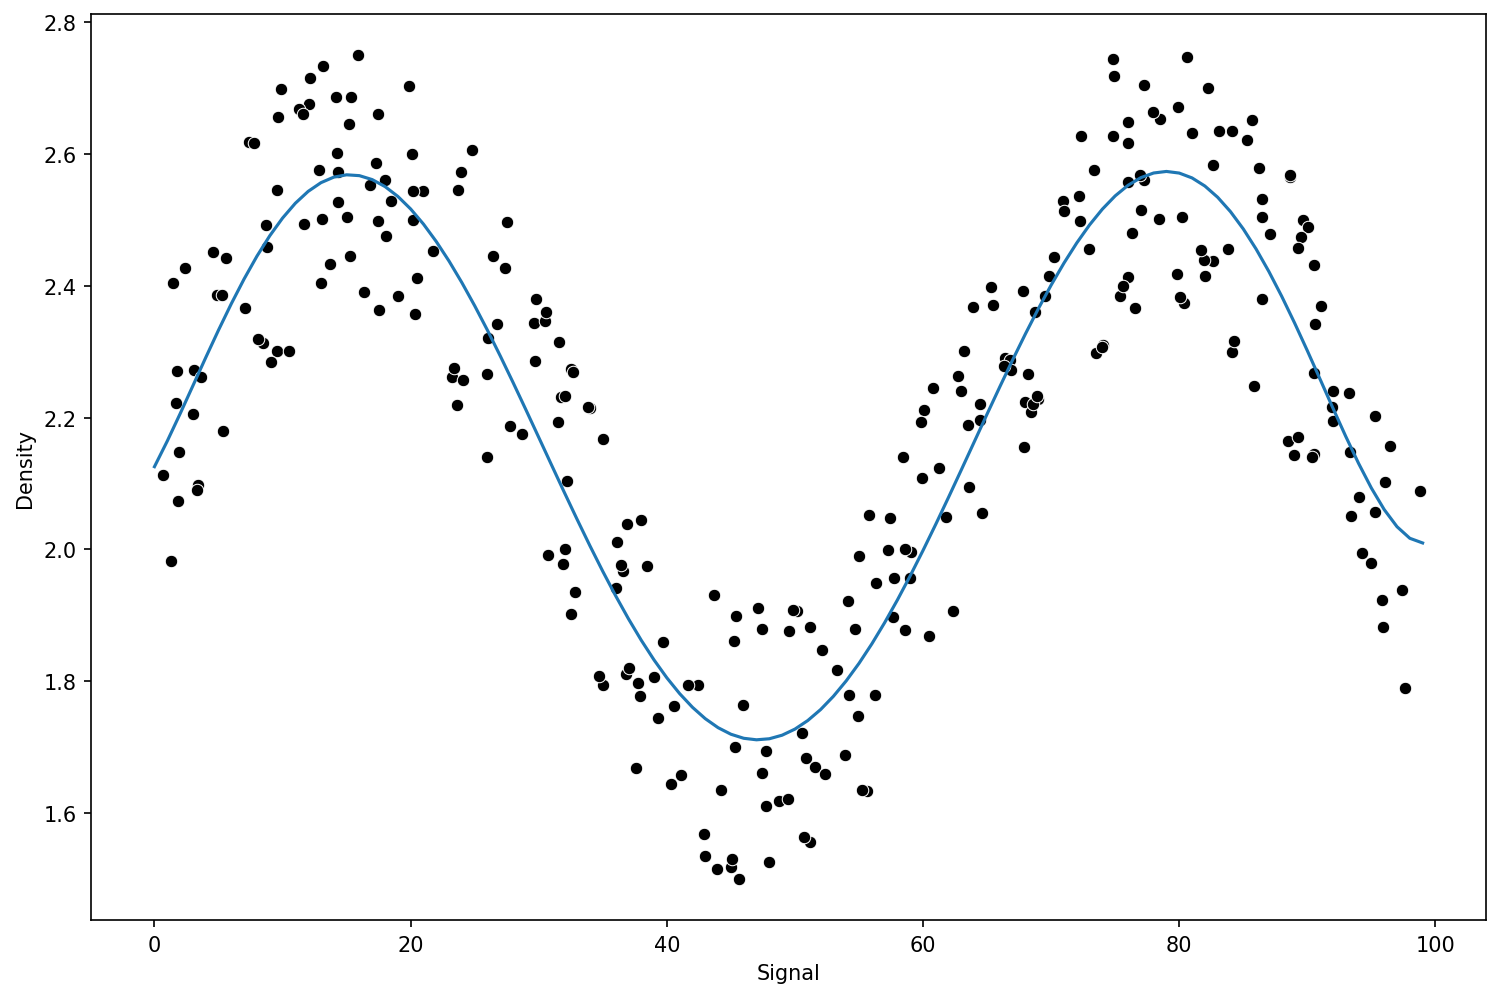

In [51]:
run_model(pipe, X_train, y_train, X_test, y_test)

In [52]:
from sklearn.neighbors import KNeighborsRegressor

r2_score: 0.6365652183593896 
 mae: 0.11877297474442382 
 mse: 0.023210127264201286 
 rmse: 0.15234870286353372
r2_score: 0.7047884294126895 
 mae: 0.12198383614100564 
 mse: 0.018853171103397175 
 rmse: 0.13730685016923655
r2_score: 0.7239391266857286 
 mae: 0.11635971693292672 
 mse: 0.01763014528594811 
 rmse: 0.13277855732740926


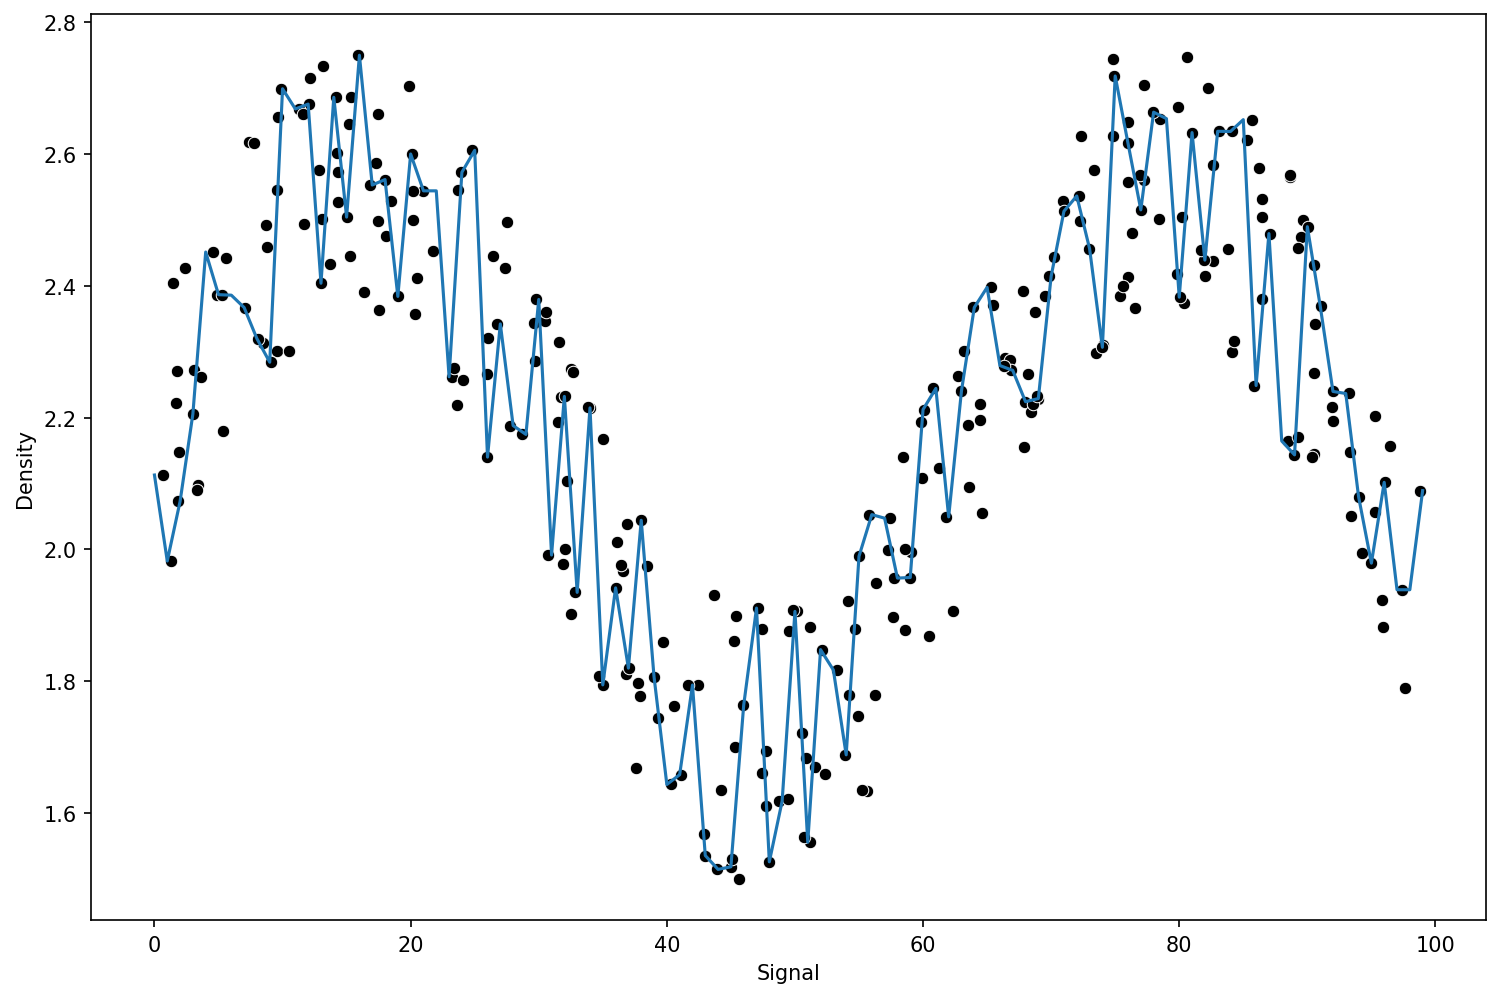

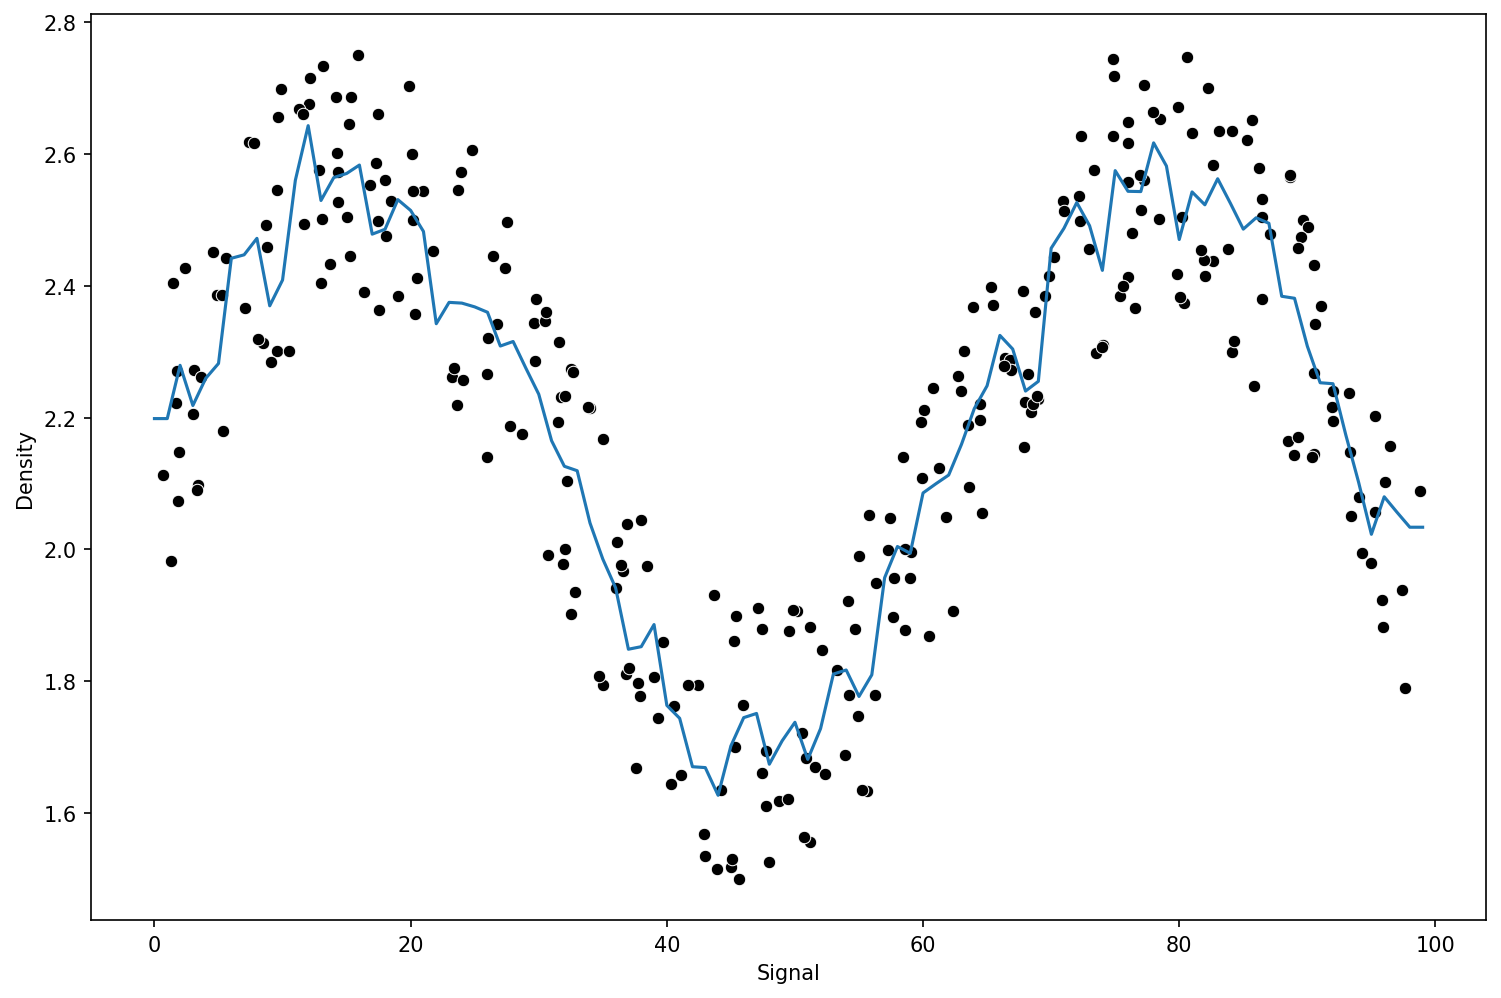

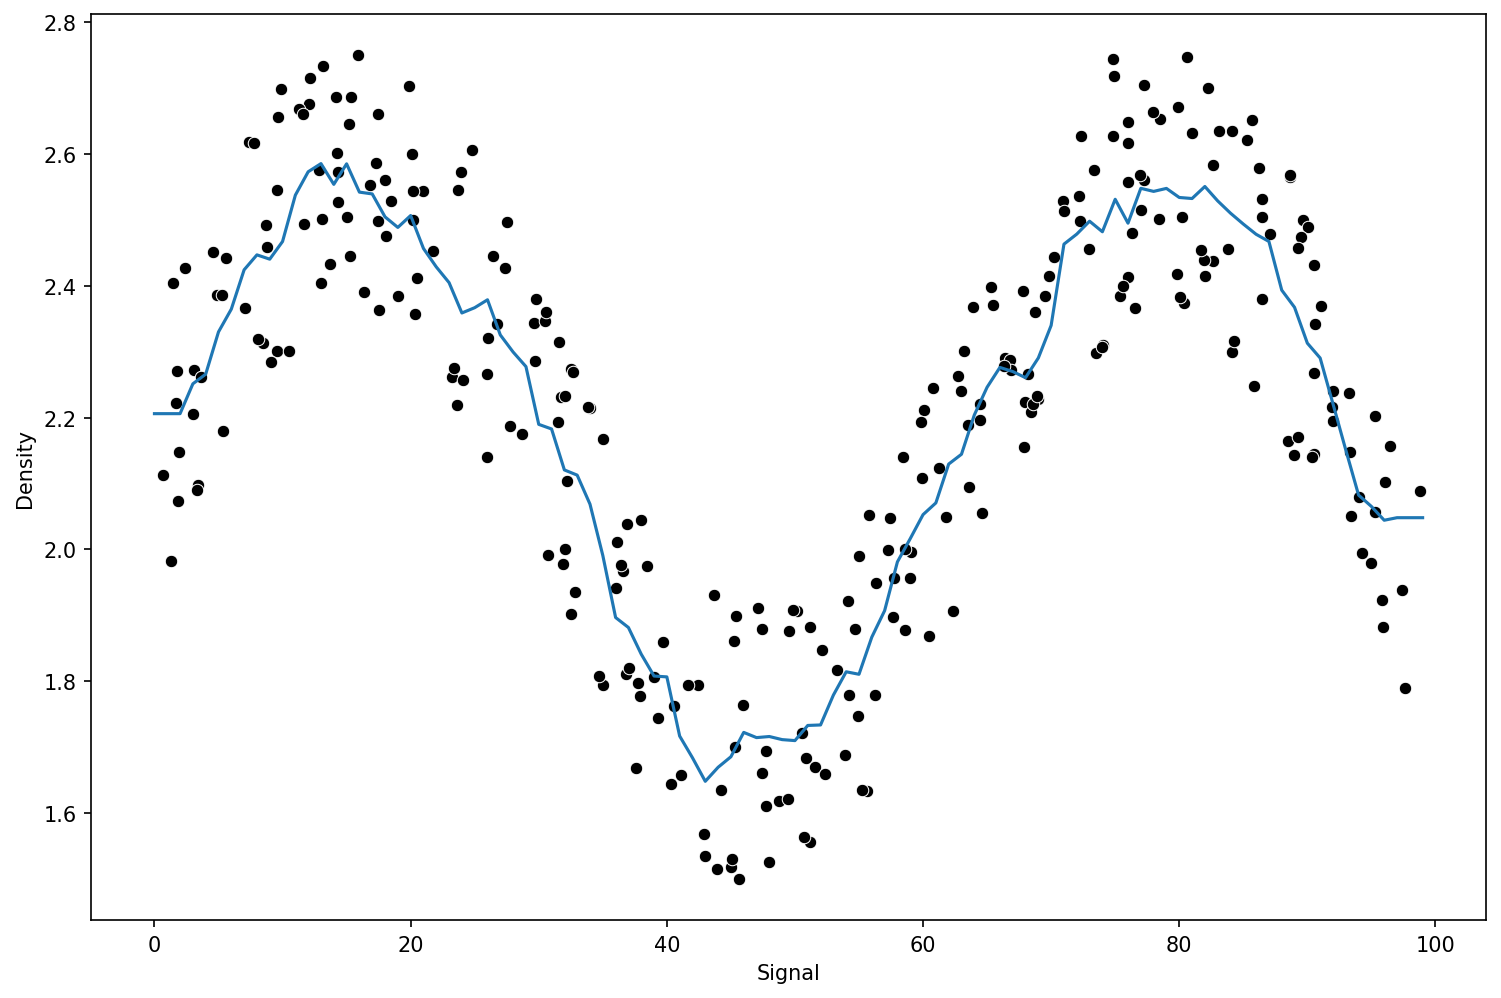

In [53]:
k_values = [1,5,10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, y_train, X_test, y_test)

In [55]:
from sklearn.tree import DecisionTreeRegressor

r2_score: 0.6365652183593896 
 mae: 0.11877297474442382 
 mse: 0.023210127264201286 
 rmse: 0.15234870286353372


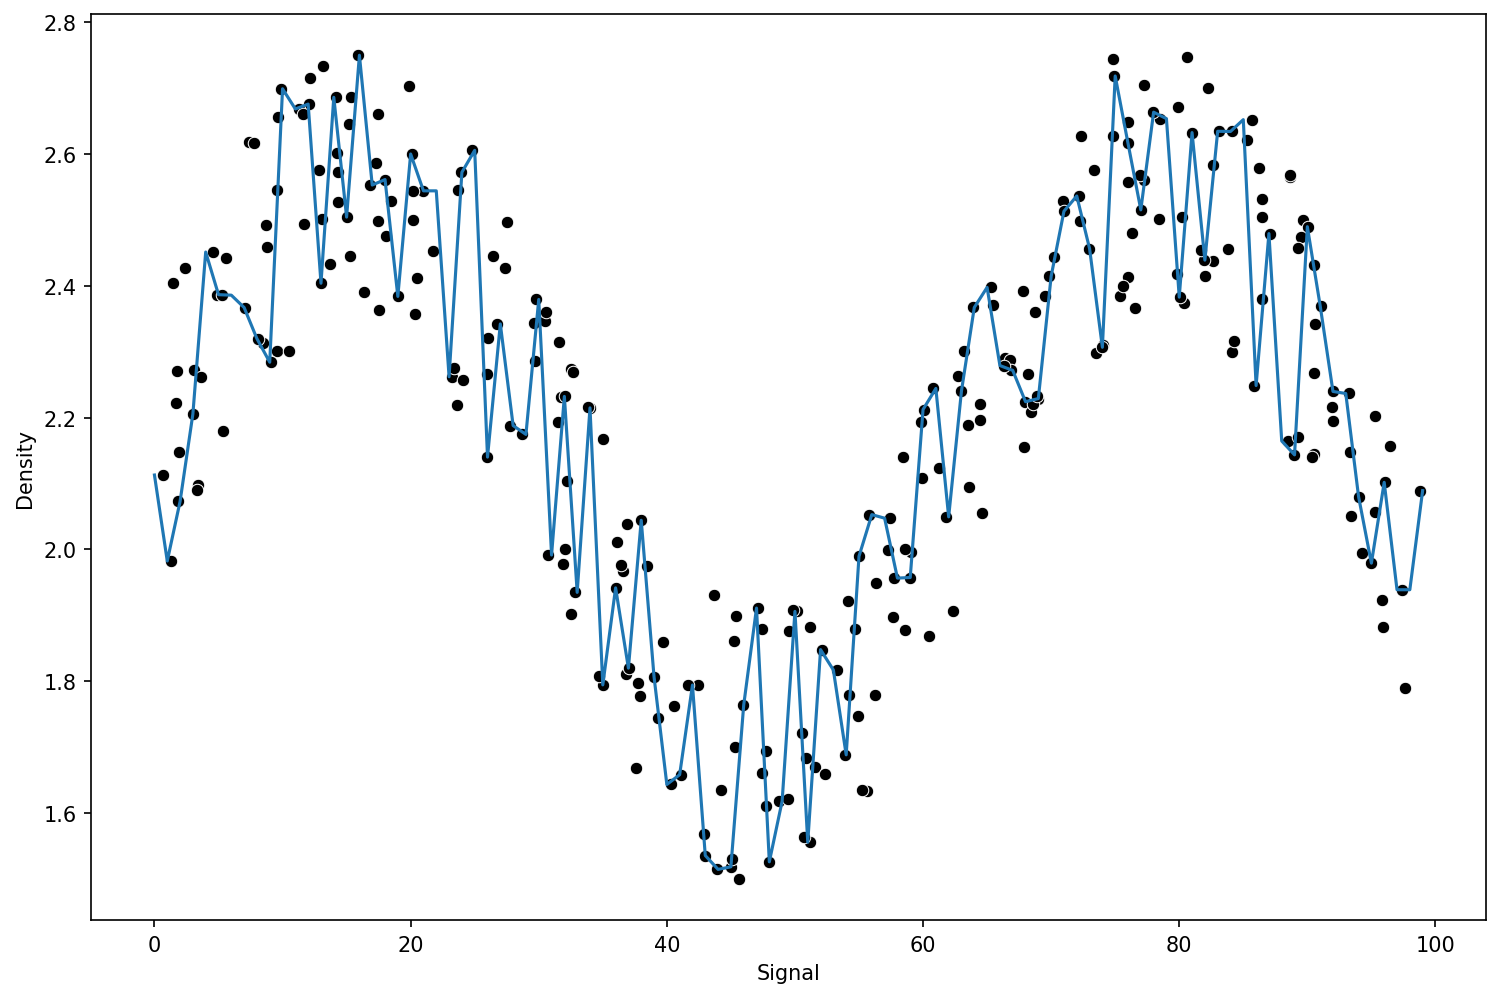

In [56]:
model = DecisionTreeRegressor()
run_model(model, X_train, y_train, X_test, y_test)

In [57]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

r2_score: 0.750036447326085 
 mae: 0.10839253242165772 
 mse: 0.015963485505662355 
 rmse: 0.12634668775105407


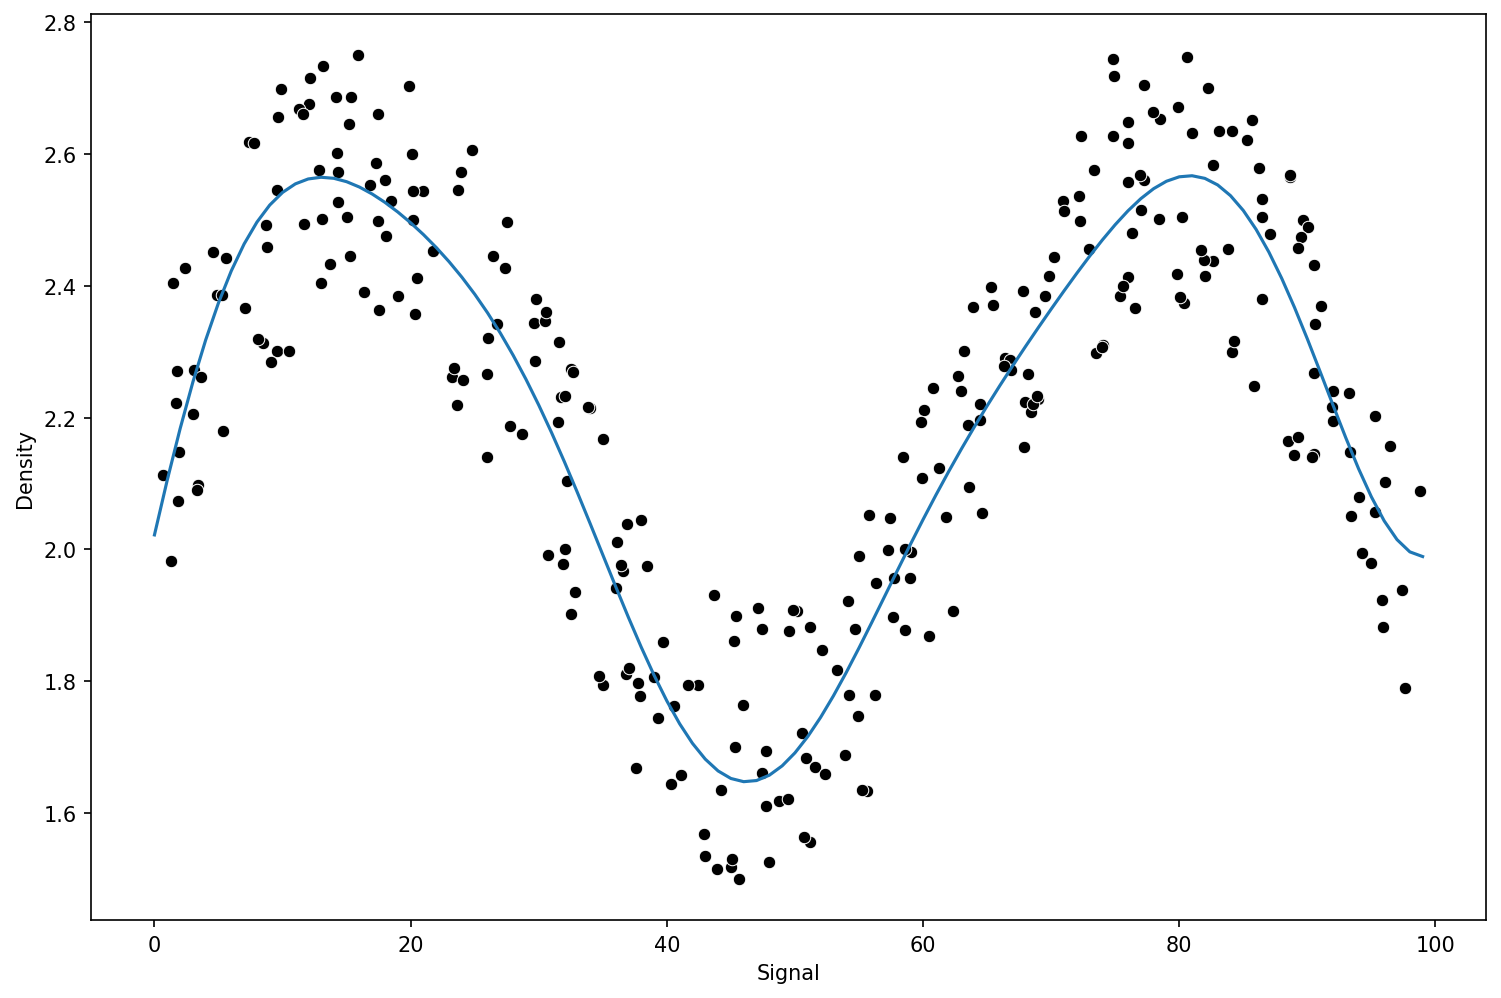

In [59]:
svr = SVR()
param_grid = {"C": [0.01,0.1,1,5,10,100,1000], "gamma":["auto","scale"]}

grid = GridSearchCV(svr,param_grid)
run_model(grid, X_train, y_train, X_test, y_test)

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rfr = RandomForestRegressor(n_estimators=10)

r2_score: 0.6685120955515454 
 mae: 0.11877175603181243 
 mse: 0.02116989577623934 
 rmse: 0.14549878273112576


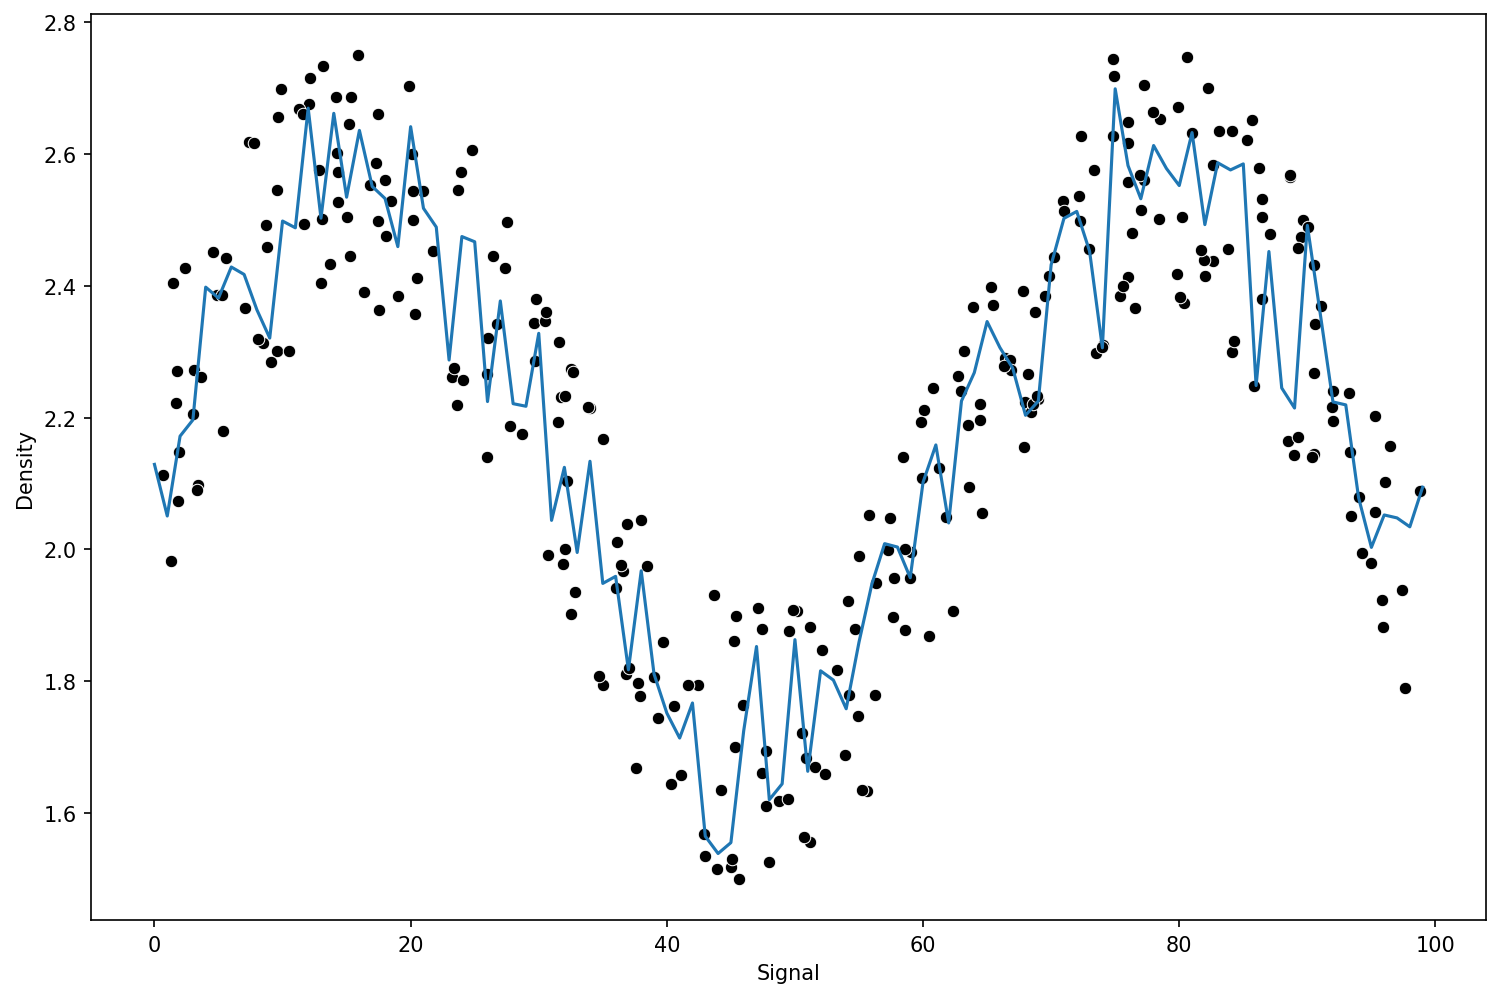

In [62]:
run_model(rfr, X_train, y_train, X_test, y_test)

In [63]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

r2_score: 0.7232612165572357 
 mae: 0.11318284854800689 
 mse: 0.01767343883172538 
 rmse: 0.13294148649584667


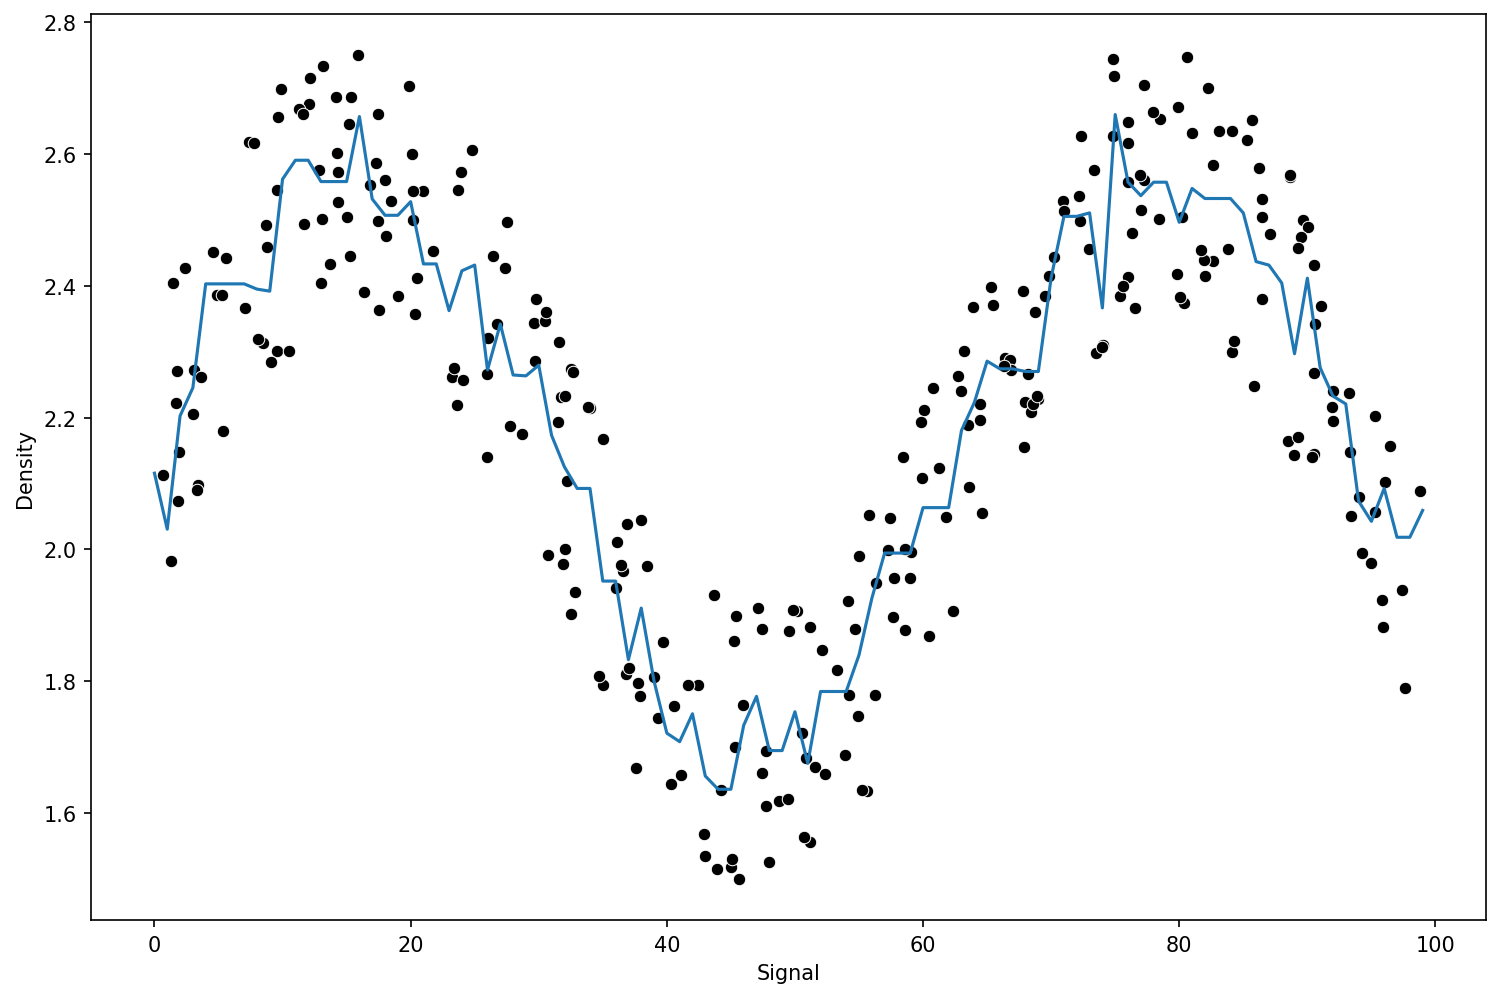

In [65]:
model = GradientBoostingRegressor()
run_model(model, X_train, y_train, X_test, y_test)

r2_score: 0.7131819383451745 
 mae: 0.11673358408381591 
 mse: 0.018317134322226255 
 rmse: 0.13534080804482532


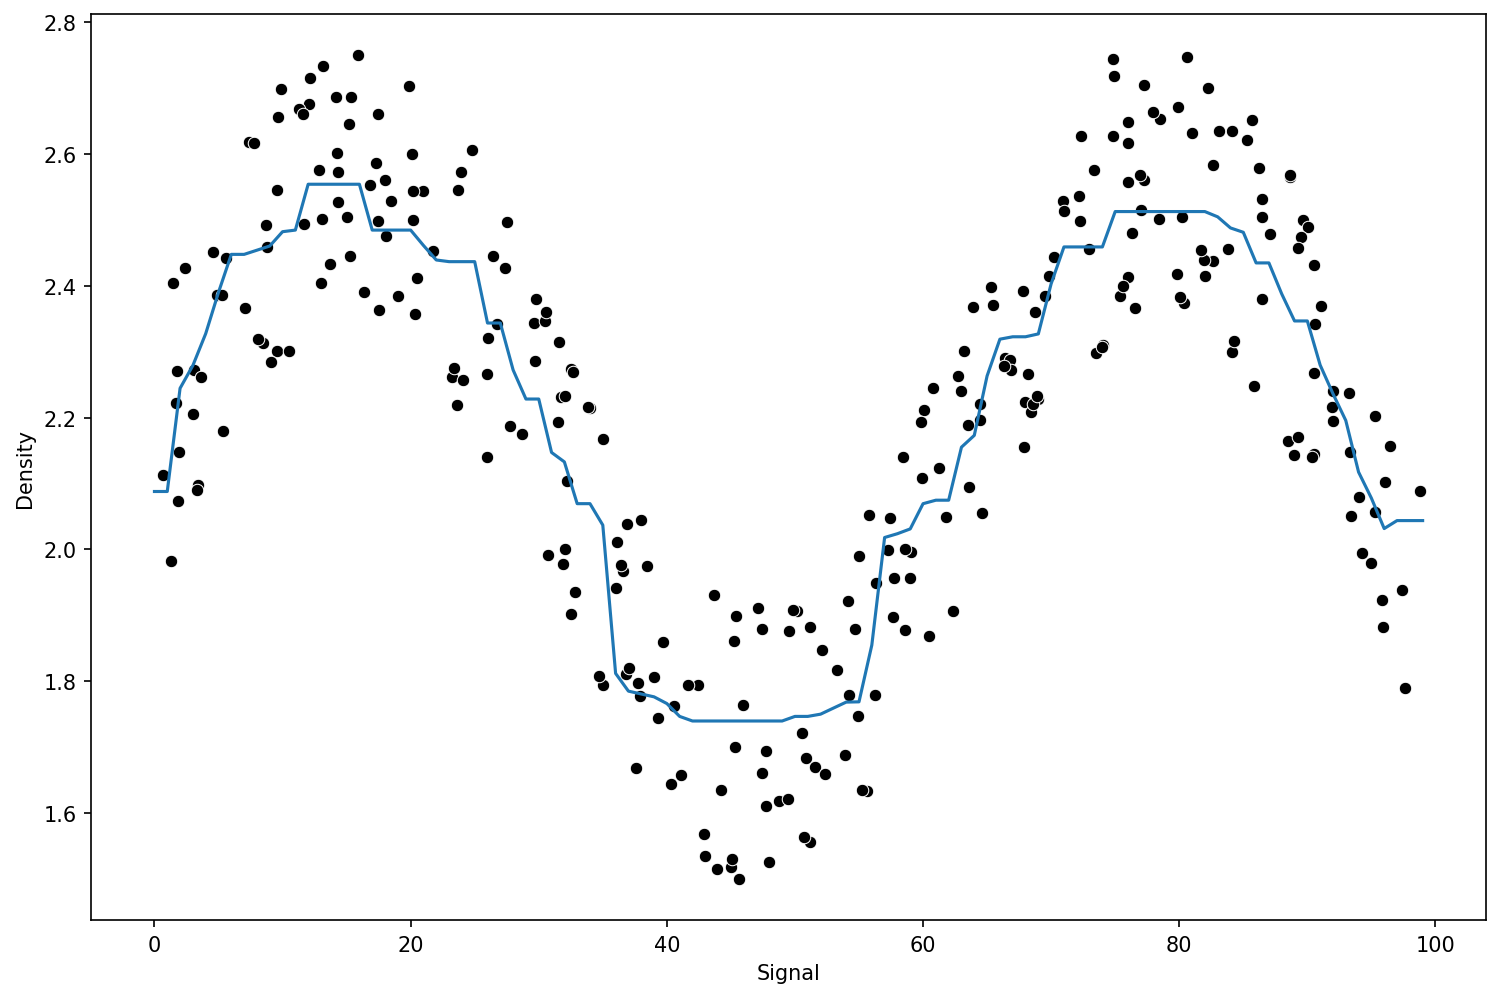

In [66]:
model = AdaBoostRegressor()
run_model(model, X_train, y_train, X_test, y_test)